In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [4]:

from imblearn.over_sampling import SMOTENC



import src.features as features
import src.model_selection as model_selection 
import src.functions as functions
import src.datasets as datasets 

In [5]:
data = datasets.data_original()
#data = features.engineer(data)

### Train test split (unprocessed)
X_, y_ = data.drop('infected', axis=1), data['infected']
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.2, random_state=42, stratify = y_)

In [6]:
"""

### Oversampling train data 
# identify categorical features 
# The dataset does not have categorical features with more than 4 categories
cat_features = [c for c in X_train_.columns if X_train_[c].nunique() < 5]
smote_nc = SMOTENC(categorical_features=cat_features, sampling_strategy=1.0, random_state=42)
X_oversampled, y_oversampled = smote_nc.fit_resample(X_train_, y_train_) 

### Scaling the data 
scaler = StandardScaler()

scaler.fit(X_train_)
"""

### Data ready for Machine Learning
X_train = X_train_
X_test =  X_test_
y_train = y_train_
y_test = y_test_ 


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## 100 Decision Tree Classifier

In [10]:



model = DecisionTreeClassifier(random_state=42, max_depth = 4)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

best_model = None
best_score = 0
best_alpha = None
for ccp_alpha in ccp_alphas:
    model_temp = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, max_depth = 4)
    scores = cross_val_score(model_temp, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_model = model_temp
        best_alpha = ccp_alpha


In [21]:
best_score

np.float64(0.8866298399058872)

In [11]:
best_alpha

np.float64(0.00862427672679237)

In [12]:
ccp_alphas

array([0.        , 0.00037102, 0.00105278, 0.00113341, 0.00123365,
       0.00282999, 0.00348649, 0.0036783 , 0.00368419, 0.00468383,
       0.00862428, 0.02105562, 0.02929051, 0.14516232])

In [13]:
ccp_alphas.shape

(14,)

In [14]:
print(f'Best cross-validated accuracy: {best_score:.2f}')


Best cross-validated accuracy: 0.89


In [15]:
X_.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')

In [16]:
best_model.fit(X_train,y_train)

# Feature importance
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,time,0.742486
17,offtrt,0.149817
19,cd420,0.107697
3,wtkg,0.000000
2,age,0.000000
1,trt,0.000000
5,homo,0.000000
4,hemo,0.000000
6,drugs,0.000000
7,karnof,0.000000


C:\Users\User\AppData\Local\Temp\ipykernel_13656\4178145888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


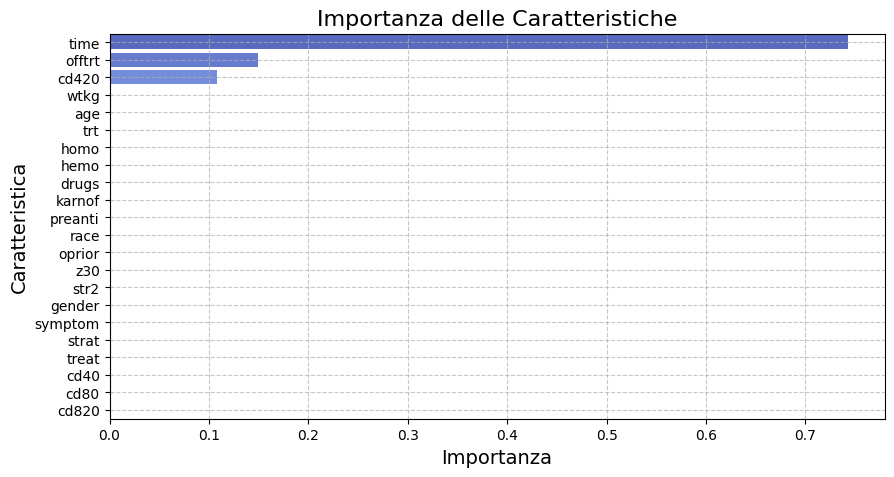

In [17]:


# Feature importance plot
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Importanza delle Caratteristiche', fontsize=16)
plt.xlabel('Importanza', fontsize=14)
plt.ylabel('Caratteristica', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [18]:
features = data.drop('infected', axis=1).columns


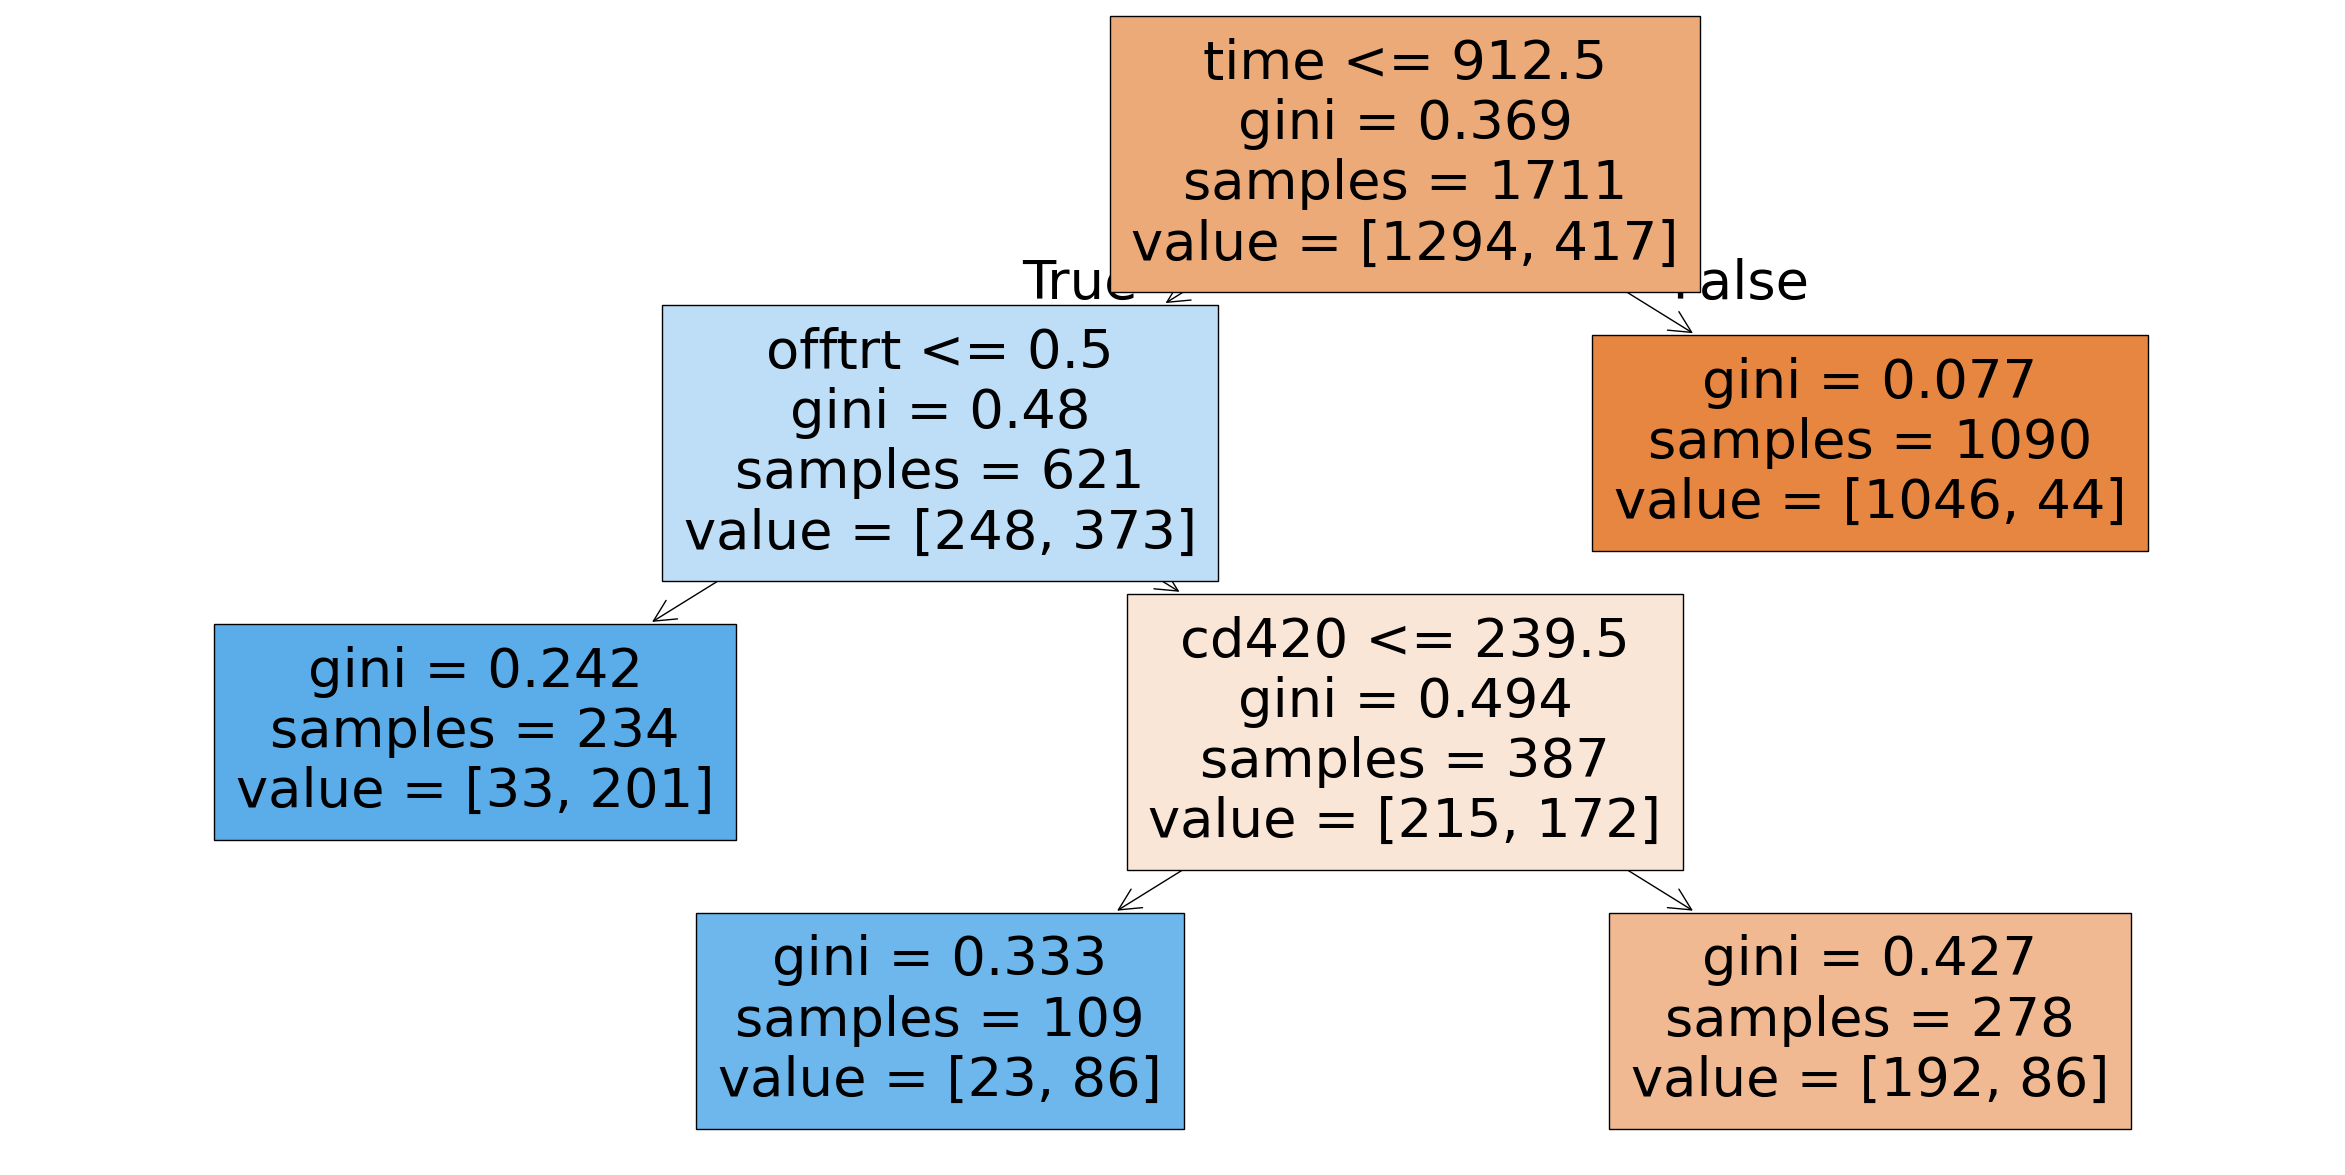

In [19]:
best_model.fit(X_train, y_train)
plt.figure(figsize = (30,15) )
plot_tree(best_model, feature_names = features, filled = True)
plt.show()

## Vanilla model